#Exploring Sentence and Domain-Specific BERT


Sentence-BERT est l'une des variantes les plus intéressantes de BERT et est couramment utilisée pour calculer la représentation des phrases. Nous commencerons le guide en comprenant en détail le fonctionnement de Sentence-BERT. Nous explorerons comment Sentence-BERT calcule la représentation des phrases en utilisant les architectures de réseau siamois et triplet. Ensuite, nous allons en apprendre davantage sur la bibliothèque de sentence transformer. Nous comprendrons comment utiliser le modèle Sentence-BERT pré-entraîné pour calculer la représentation des phrases avec la bibliothèque  senctence transformer


Ensuite, nous comprendrons comment rendre le modèle unilingue multilingue avec une distillation des connaissances en détail. Ensuite, nous découvrirons plusieurs modèles BERT intéressants spécifiques à un domaine, tels que ClinicalBERT et BioBERT. Nous apprendrons comment ClinicalBERT est formé et comment il est utilisé pour prédire la probabilité de réadmission.

Ensuite, nous comprendrons comment BioBERT est formé et nous verrons comment affiner le BioBERT pré-formé pour la reconnaissance d'entités nommées (NER) et les tâches de réponse aux questions.

* Dans ce guide, nous aborderons les sujets suivants :

* Apprendre la représentation des phrases avec Sentence-BERT
* Explorer la bibliothèque de transformateurs de phrases
* Apprendre les plongements multilingues grâce à la distillation des connaissances
* Modèles BERT spécifiques au domaine tels que ClinicalBERT et BioBERT




## Apprendre la représentation des phrases avec Sentence-BERT
La phrase-BERT a été introduite par le Ubiquitous Knowledge Processing Lab (UKP-TUDA). Comme son nom l'indique, Sentence-BERT est utilisé pour obtenir des représentations de phrases de longueur fixe. Sentence-BERT étend le modèle BERT pré-entraîné (ou ses variantes) pour obtenir la représentation de la phrase. 

Attendre! Pourquoi avons-nous besoin de Sentence-BERT pour obtenir des représentations de phrases ? On peut directement utiliser le BERT vanille ou ses variantes pour obtenir la représentation de la phrase, non ? Oui!

Mais l'un des défis du modèle BERT vanille est son temps d'inférence élevé. Disons que nous avons un ensemble de données avec un nombre de phrases ; puis, pour trouver une paire de phrases avec une forte similarité, il faut des calculs.

Pour lutter contre ce temps d'inférence élevé, nous utilisons Sentence-BERT. Sentence-BERT réduit considérablement le temps d'inférence de BERT. Sentence-BERT est couramment utilisé dans des tâches telles que la classification de paires de phrases, le calcul de la similarité entre deux phrases, etc. Avant de comprendre comment Sentence-BERT fonctionne en détail, examinons d'abord le calcul de la représentation des phrases à l'aide du modèle BERT pré-entraîné dans la section suivante.

## Calcul de la représentation des phrases
Considérez la phrase Paris is a beautifull city. Supposons que nous ayons besoin de calculer la représentation de la phrase donnée. Tout d'abord, nous allons tokeniser la phrase et ajouter un token [CLS] au début et un token [SEP] à la fin, de sorte que nos tokens deviennent les suivants


    tokens = [ [CLS], Paris, is, a, beautiful, city, [SEP] ]

Maintenant, nous transmettons les jetons au BERT pré-entraîné et il renverra la représentation, $R_i$, pour chacun des jetons, $i$, comme le montre la figure suivante :

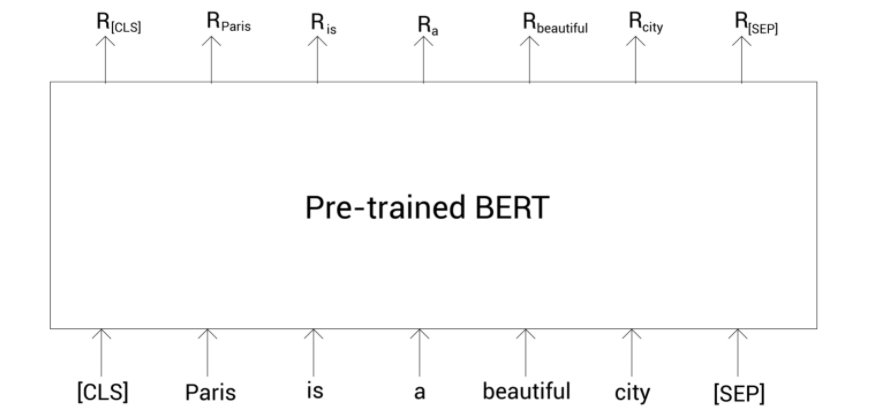

Bon, nous avons obtenu la représentation,$R_i$ , pour chacun des jetons. Comment obtenir la représentation de la phrase complète ? Nous avons appris que la représentation du jeton [CLS],$R_{[CLS]}$ , contient la représentation agrégée de la phrase. Ainsi, nous pouvons utiliser la représentation du jeton [CLS],$R_{[CLS]}$  , comme représentation de la phrase.



Mais le problème avec l'utilisation de la représentation du jeton [CLS] en tant que représentation de la phrase est que la représentation de la phrase ne sera pas précise, surtout si nous utilisons directement le modèle BERT pré-entraîné sans l'affiner. Ainsi, au lieu d'utiliser la représentation du jeton [CLS] comme représentation de phrase, nous pouvons utiliser le pooling. C'est-à-dire que nous calculons la représentation de la phrase en mettant en commun la représentation de tous les jetons. La mise en commun moyenne et la mise en commun maximale sont les deux stratégies de mise en commun les plus couramment utilisées. D'accord, en quoi la mise en commun et la mise en commun maximale seraient-elles utiles ici ?

Si nous obtenons la représentation de la phrase en appliquant la mise en commun des moyennes à la représentation de tous les tokens, alors essentiellement, la représentation de la phrase détient le sens de tous les mots (tokens).
Si nous obtenons la représentation de la phrase en appliquant max pooling à la représentation de tous les jetons, alors essentiellement, la représentation de la phrase détient le sens des mots importants (les jetons).
Ainsi, nous pouvons calculer la représentation d'une phrase en regroupant la représentation de tous les jetons comme le montre la figure suivante

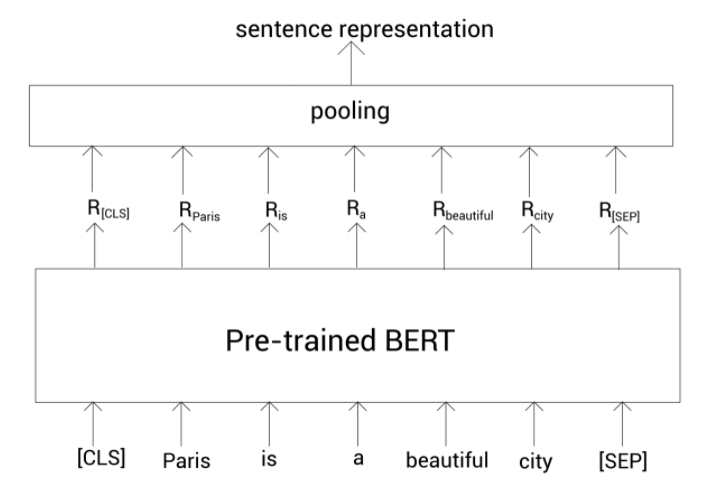

Maintenant que nous avons appris à calculer la représentation des phrases à l'aide d'un modèle BERT pré-entraîné, voyons comment Sentence-BERT fonctionne en détail dans la section suivante.

## Comprendre la phrase-BERT

Notez que nous ne formons pas Sentence-BERT à partir de zéro. Dans Sentence-BERT, nous prenons le modèle BERT pré-entraîné (ou ses variantes) et l'affinons pour obtenir la représentation de la phrase. En d'autres termes, Sentence-BERT est essentiellement un modèle BERT pré-entraîné qui est affiné pour le calcul de la représentation des phrases. D'accord, alors quelle est la particularité de Sentence-BERT ? Pour affiner le BERT pré-entraîné, Sentence-BERT utilise des architectures de réseau siamois et triplet, ce qui accélère le réglage fin et aide à obtenir une représentation précise de la phrase.

Sentence-BERT utilise une architecture de réseau siamois(Siamese) pour les tâches qui impliquent une paire de phrases en entrée. Il utilise une architecture de réseau triplet pour la fonction objectif de perte triplet. Regardons chacun d'eux de plus près.

## SENTENCE-BERT AVEC UN RÉSEAU SIAMOIS (Siamese)
Sentence-BERT utilise l'architecture de réseau siamois pour affiner le modèle BERT pré-entraîné pour les tâches de paires de phrases. Dans cette section, comprenons comment l'architecture du réseau siamois est utile et comment nous affinons le BERT pré-entraîné pour les tâches de paires de phrases. Tout d'abord, nous verrons comment fonctionne Sentence-BERT pour une tâche de classification de paires de phrases, puis nous apprendrons comment Sentence-BERT fonctionne pour une tâche de régression de paires de phrases.




## sentence-BERT pour une tâche de classification de paires de phrases
Supposons que nous ayons un ensemble de données contenant des paires de phrases et une étiquette binaire indiquant si les paires de phrases sont similaires (1) ou différentes (0), comme le montre la figure suivante :

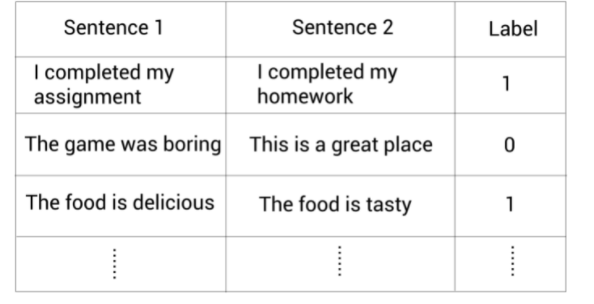

Voyons maintenant comment affiner le modèle BERT pré-entraîné avec l'ensemble de données précédent en utilisant l'architecture siamoise pour la tâche de classification de paires de phrases. Prenons la première paire de phrases de notre ensemble de données :

Sentence 1: I completed my assignment

Sentence 2: I completed my homework s

Nous devons classer si la paire de phrases donnée est similaire (1) ou dissemblable (0). Tout d'abord, nous tokenisons la phrase et ajoutons les jetons [CLS] et [SEP] au début et à la fin de la phrase, respectivement, comme indiqué :


    Tokens 1 = [ [CLS], I completed, my, assignment, [SEP]]

    Tokens 2 = [ [CLS], I, completed, my, homework, [SEP]]

Maintenant, nous alimentons les jetons dans le modèle BERT pré-entraîné et obtenons la représentation de chacun des jetons. Nous avons appris que Sentence-BERT utilise un réseau siamois. On sait que le réseau siamois est constitué de deux réseaux identiques qui partagent les mêmes poids. Nous utilisons donc ici deux modèles BERT pré-entraînés identiques. Nous alimentons les jetons de la phrase 1 à un BERT et les jetons de la phrase 2 à un autre BERT et calculons la représentation des deux phrases données.

Pour calculer la représentation d'une phrase, nous appliquons la mise en commun moyenne ou maximale. Par défaut, dans Phrase-BERT, nous utilisons la mise en commun des moyennes. Après avoir appliqué l'opération de regroupement, nous aurons une représentation de phrase pour la paire de phrases donnée, comme le montre la figure suivante :

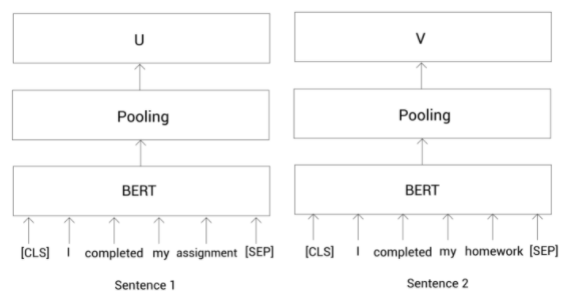

Dans la figure précédente, dénote la représentation de la phrase 1 Sentence_1 et dénote la représentation de la phrase 2 Sentence_1. Maintenant, nous concaténons les représentations de phrases et avec une différence au niveau des éléments et multiplions par le poids,$W$ , comme indiqué ici :

$$W_t(u, v|u-v|)$$

Notez que la dimension du poids est n x k, où n est la dimension de l'inclusion de la phrase et k est le nombre de classes. Ensuite, nous transmettons le résultat à une fonction softmax, qui renvoie la probabilité de similarité entre la paire de phrases donnée :

$$Softmax(W_t(u, v|u-v|)=$$

Ceci est montré dans la figure suivante. Comme nous l'observons, nous alimentons d'abord la paire de phrases aux modèles BERT pré-entraînés et obtenons la représentation de la phrase par mise en commun, puis nous concaténons la représentation de la paire de phrases et la multiplions par les poids,$W$ , et alimentons le résultat à la fonction softmax :

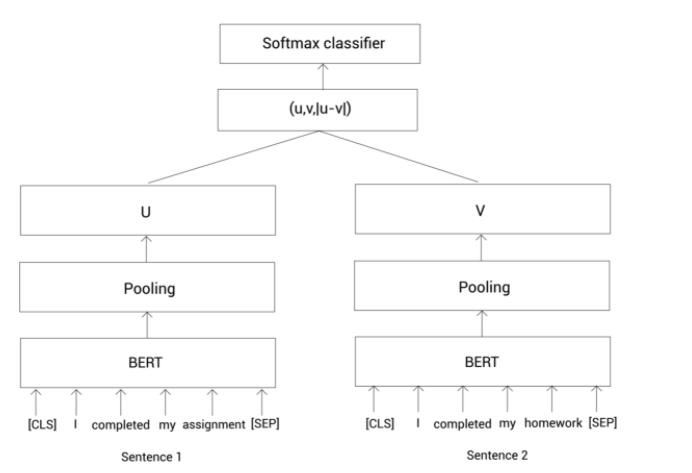

Nous formons le réseau précédent en minimisant la perte d'entropie croisée et en mettant à jour le poids,$W$ . De cette façon, nous pouvons utiliser Sentence-BERT pour une tâche de classification de paires de phrases.

## Sentence-BERT pour une tâche de régression de paires de phrases

Dans la section précédente, nous avons appris comment Sentence-BERT utilise l'architecture siamoise pour une tâche de classification de paires de phrases. Dans cette section, voyons comment Sentence-BERT fonctionne pour une tâche de régression de paires de phrases. Supposons que nous ayons un ensemble de données contenant des paires de phrases et leurs scores de similarité, comme illustré dans la figure suivante :

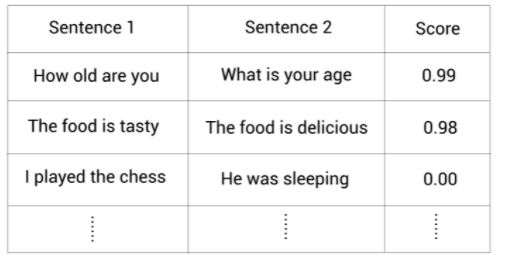

Voyons maintenant comment affiner le modèle BERT pré-entraîné avec l'ensemble de données précédent en utilisant l'architecture siamoise pour la tâche de régression de paires de phrases. Dans la tâche de régression de paires de phrases, notre objectif est de prédire la similarité sémantique entre deux phrases données. Prenons la première paire de phrases de notre ensemble de données :

    Sentence 1: How old are you

    Sentence 2: What is your age

Maintenant, nous devons calculer le score de similarité entre les deux phrases données.

Tout comme nous l'avons vu dans la section précédente, nous tokenisons d'abord les deux phrases données et ajoutons les jetons [CLS] et [SEP] au début et à la fin des phrases, respectivement, comme indiqué :


    Tokens 1 = [ [CLS], How, old, are, you, [SEP]]

    Tokens 2 = [ [CLS], What, is, your, age, [SEP]]

Maintenant, nous alimentons les jetons dans le modèle BERT pré-entraîné et obtenons la représentation de chacun des jetons. Nous avons appris que Sentence-BERT utilise un réseau siamois. Nous utilisons donc ici deux modèles BERT pré-entraînés identiques. Nous alimentons les jetons de la phrase 1 à un modèle BERT et les jetons de la phrase 2 à un autre modèle BERT et calculons la représentation des deux phrases données en appliquant le pooling.

Soit $u$ la représentation de la phrase 1 et $v$la représentation de la phrase 2. Ensuite, nous calculons la similarité entre les deux phrases en utilisant une mesure de similarité telle que la similarité en cosinus, comme suit :

$$Similatry == cosine(u,v)$$


Comme le montre la figure suivante, nous alimentons deux phrases à deux modèles BERT pré-entraînés et obtenons leur représentation de phrase par mise en commun. Ensuite, nous calculons la similarité entre les représentations de phrases en utilisant la fonction de similarité cosinus :

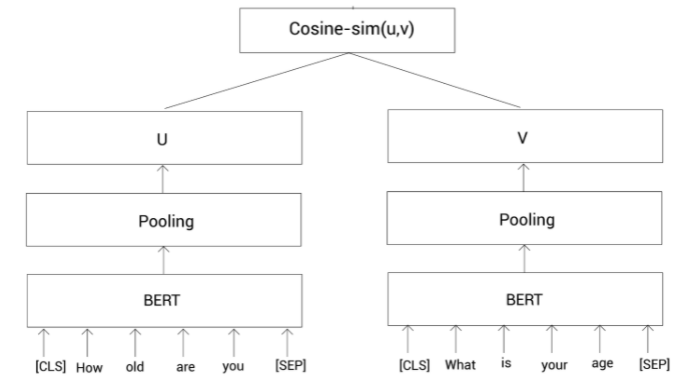

Nous formons le réseau précédent en minimisant la perte quadratique moyenne et en mettant à jour le poids du modèle. De cette façon, nous pouvons utiliser Sentence-BERT pour la tâche de régression de paires de phrases.

## SENTENCE-BERT AVEC UN RÉSEAU TRIPLE
Dans la section précédente, nous avons examiné l'architecture de Sentence-BERT pour les tâches de régression et de classification de paires de phrases. Nous avons appris que Sentence-BERT utilise l'architecture de réseau siamois pour affiner le BERT pré-entraîné avec les entrées de paires de phrases. Dans cette section, voyons comment Sentence-BERT utilise l'architecture de réseau triplet.

Supposons que nous ayons trois phrases - une phrase d'ancrage, une phrase positive (implication) et une phrase négative (contradiction), comme suit :

* Phrase d'ancrage : jouez le jeu
* Phrase positive : Il joue le jeu
* Phrase négative : Ne jouez pas au jeu

Notre tâche est de calculer une représentation telle que la similarité entre l'ancre et les phrases positives devrait être élevée et la similarité entre l'ancre et les phrases négatives devrait être faible. Voyons comment affiner le modèle BERT pré-entraîné pour cette tâche. Puisque nous avons trois phrases, dans ce cas, Sentence-BERT utilise l'architecture de réseau triplet.

Tout d'abord, nous tokenisons et alimentons les phrases d'ancrage, positives et négatives aux trois modèles BERT pré-entraînés, puis obtenons la représentation de chacune des phrases grâce à la mise en commun, comme le montre la figure suivante :

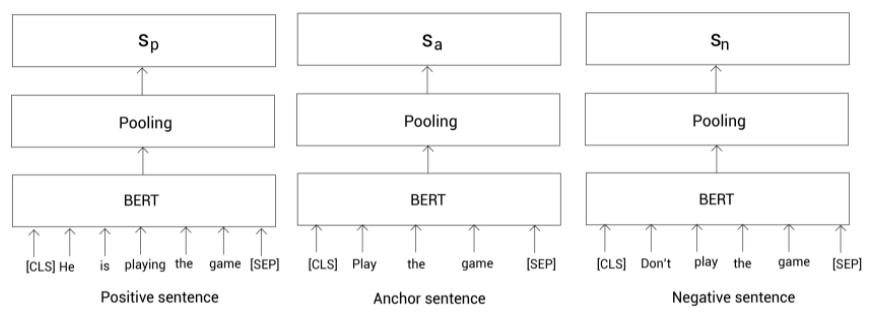

Comme nous pouvons l'observer, dans la figure précédente,$s_a$ ,$s_p$ ,$s_n$ et désignent la représentation des phrases d'ancrage, positives et négatives, respectivement. Ensuite, nous entraînons notre réseau pour minimiser la fonction objectif triplet suivante :

$$max(||s_a-s_p||-||s_a-s_n||+ϵ,0) $$


Dans l'équation précédente, $||.||$désigne la métrique de distance. Nous utilisons la distance euclidienne comme mesure de distance.$ϵ$ désigne la marge; il est utilisé pour s'assurer que la représentation de phrase positive,$s_p$ , est au moins plus proche de la phrase d'ancrage,$s_a$ , que la représentation de phrase négative,$s_n$ .

Comme le montre la figure suivante, nous alimentons les phrases d'ancrage, positives et négatives du modèle BERT et obtenons leur représentation grâce à la mise en commun. Ensuite, nous entraînons le réseau pour minimiser la fonction de perte de triplet. La minimisation de la fonction de perte de triplet garantit que la similitude entre les phrases positives et d'ancrage est supérieure à la similitude entre les phrases négatives et d'ancrage :

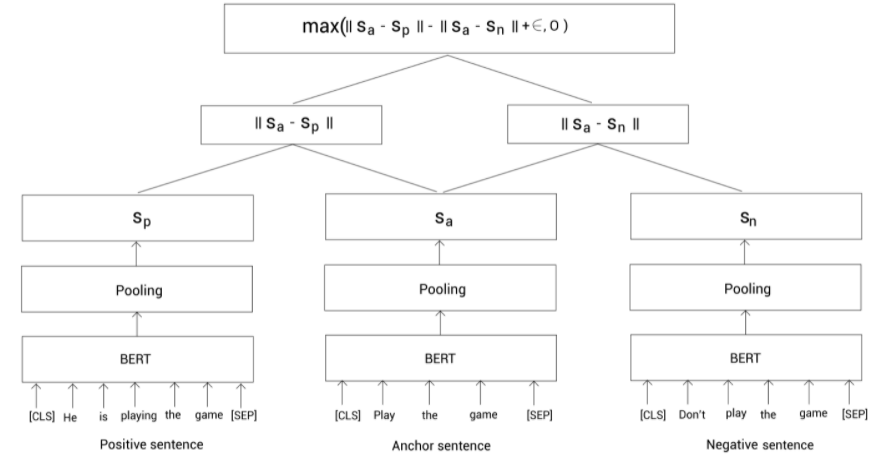

Ainsi, de cette manière, nous pouvons utiliser Sentence-BERT avec une fonction objectif de perte de triplet. Les chercheurs de Sentence-BERT ont également ouvert leur bibliothèque de transformateurs de phrases, qui est utilisée pour calculer la représentation des phrases via Sentence-BERT. Dans la section suivante, nous allons apprendre à utiliser la bibliothèque de transformateurs de phrases.

## Explorer la bibliothèque de sentence transformer
La bibliothèque de sentence transformer peut être installée à l'aide de pip comme indiqué dans le code suivant :

In [3]:
#! pip install -U sentence-transformers

Les chercheurs de Sentence-BERT ont également mis en ligne leurs modèles Sentence-BERT pré-entraînés. Tous les modèles pré-formés disponibles peuvent être trouvés ici : https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/.

Nous pouvons trouver des modèles pré-entraînés nommés bert-base-nli-cls-token, bert-base-nli-mean-token, roberta-base-nli-max-tokens, distilbert-base-nli-mean-tokens, etc. au. Comprenons ce que cela signifie :

* bert-base-nli-cls-token est un modèle Sentence-BERT pré-entraîné dans lequel nous avons pris un modèle de base BERT pré-entraîné et l'avons affiné avec l'ensemble de données NLI, et le modèle utilise un jeton [CLS] comme la représentation de la phrase.

* bert-base-nli-mean-token est un modèle Sentence-BERT pré-entraîné dans lequel nous avons pris un modèle de base BERT pré-entraîné et l'avons affiné avec l'ensemble de données NLI, et le modèle utilise une stratégie de mise en commun moyenne pour le calcul représentation de la phrase.

* roberta-base-nli-max-tokens est un modèle Sentence-BERT pré-entraîné dans lequel nous avons pris un modèle de base RoBERTa pré-entraîné et l'avons affiné avec l'ensemble de données NLI, et le modèle utilise une stratégie de mise en commun maximale pour le calcul représentation de la phrase.

* distilbert-base-nli-mean-token est un modèle Sentence-BERT pré-entraîné où nous avons pris un modèle de base DistilBERT pré-entraîné et l'avons affiné avec l'ensemble de données NLI, et le modèle utilise une stratégie de mise en commun moyenne pour le calcul représentation de la phrase.

Ainsi, lorsque nous disons le modèle Sentence-BERT pré-entraîné, cela implique essentiellement que nous avons pris un modèle BERT pré-entraîné et l'avons affiné à l'aide de l'architecture de réseau siamois/triplet. Dans les sections à venir, nous apprendrons à utiliser des modèles Sentence-BERT pré-entraînés.

## Calcul de la représentation des phrases à l'aide de Sentence-BERT
Voyons comment calculer la représentation de la phrase à l'aide d'un modèle Sentence-BERT pré-entraîné. Tout d'abord, importons le module SentenceTransformer de notre bibliothèque phrase_transformers :

In [4]:
from sentence_transformers import SentenceTransformer

Téléchargez et chargez la phrase-BERT pré-entraînée :

In [5]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Définissez la phrase pour laquelle nous devons calculer les représentations de phrase :

In [6]:
sentence = 'paris is a beautiful city'

Calculez la représentation de la phrase à l'aide de notre modèle Sentence-BERT pré-entraîné avec la fonction d'encodage :

In [7]:
sentence_representation = model.encode(sentence)

Maintenant, vérifions la forme de notre représentation :

In [8]:
print(sentence_representation.shape)

(768,)


Comme nous pouvons le voir, la taille de notre représentation de phrase est de 768. De cette façon, nous pouvons utiliser le modèle Sentence-BERT pré-entraîné et obtenir la représentation de phrase de longueur fixe.

## Calcul de la similarité des phrases
Dans cette section, apprenons à calculer la similarité sémantique entre deux phrases à l'aide du modèle Sentence-BERT pré-entraîné.

Importez les bibliothèques nécessaires :

In [9]:
import scipy
from sentence_transformers import SentenceTransformer, util

Téléchargez et chargez le modèle Sentence-BERT pré-entraîné :

In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

Définissez la paire de phrases :

In [10]:
sentence1 = 'It was a great day' 
sentence2 = 'Today was awesome'

Calculez la représentation de la phrase de la paire de phrases :

In [11]:
sentence1_representation = model.encode(sentence1)
sentence2_representation = model.encode(sentence2)

Calculez la similarité en cosinus entre les deux représentations de phrases :

In [13]:
cosine_sim = \
util.pytorch_cos_sim(sentence1_representation,sentence2_representation)

print(cosine_sim)

tensor([[0.9313]])


D'après le résultat précédent, nous pouvons observer que la paire de phrases donnée est similaire à 93 %. De cette façon, nous pouvons utiliser le modèle Sentence-BERT pré-entraîné pour les tâches de similarité de phrases.

## Chargement de modèles personnalisés
Outre les modèles Sentence-BERT pré-entraînés disponibles dans la bibliothèque de transformateurs de phrases, nous pouvons également utiliser nos propres modèles. Supposons que nous ayons un modèle ALBERT pré-entraîné. Voyons maintenant comment utiliser ce modèle ALBERT pré-entraîné pour obtenir la représentation de la phrase.

Commençons par importer les modules nécessaires :

In [14]:
from sentence_transformers import models,SentenceTransformer

Maintenant, nous définissons notre modèle d'intégration de mots, qui renverra la représentation de chaque jeton dans la phrase donnée. Utilisons ALBERT pré-entraîné comme modèle d'intégration de mots :

In [15]:
word_embedding_model = models.Transformer('albert-base-v2')

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

Ensuite, nous définissons le modèle de regroupement qui calcule la représentation regroupée des jetons. Nous avons appris que dans Sentence-BERT, nous utilisons différentes stratégies pour obtenir la représentation de la phrase, telles que les jetons [CLS], la mise en commun moyenne ou la mise en commun maximale. Maintenant, nous définissons la stratégie de regroupement que nous voulons utiliser pour calculer la représentation de la phrase. Comme le montre l'extrait de code suivant, dans cet exemple, nous avons défini pooling_mode_mean_tokens = True, ce qui implique que nous utilisons le pooling moyen pour calculer la représentation de la phrase de longueur fixe :

In [16]:
pooling_model = \
models.Pooling(word_embedding_model.get_word_embedding_dimension(),
               pooling_mode_mean_tokens=True,
               pooling_mode_cls_token=False,
               pooling_mode_max_tokens=False)

C'est ça! Maintenant, nous définissons notre phrase-BERT avec le mot modèles d'intégration et de mise en commun, comme indiqué dans le code suivant :

In [17]:
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Nous pouvons utiliser ce modèle et calculer la représentation de la phrase comme indiqué :

In [19]:
len(model.encode('Transformers are awesome'))

768

Le code précédent renverra un vecteur de forme 768 contenant la représentation de la phrase donnée. Il calcule essentiellement la représentation de chaque jeton dans la phrase donnée et renvoie la valeur regroupée en tant que représentation de la phrase.

## Trouver une phrase similaire avec Phrase-BERT
Dans cette section, explorons comment trouver une phrase similaire à l'aide de Sentence-BERT. Supposons que nous ayons un site Web de commerce électronique et que nous ayons dans notre dictionnaire principal de nombreuses questions relatives aux commandes, telles que Comment annuler ma commande ?, Fournissez-vous un remboursement ?, etc. Désormais, lorsqu'une nouvelle question arrive, notre objectif est de trouver la question la plus liée dans notre dictionnaire principal à la nouvelle question. Voyons comment nous pouvons le faire en utilisant Sentence-BERT.

Tout d'abord, importons les bibliothèques nécessaires :

In [20]:
from sentence_transformers import SentenceTransformer, util
import numpy as np 

Téléchargez et chargez le modèle Sentence-BERT pré-entraîné :

In [21]:
model = SentenceTransformer('bert-base-nli-mean-tokens')


Définissez le dictionnaire maître :

In [22]:
master_dict = [
                 'How to cancel my order?',
                 'Please let me know about the cancellation policy?',
                 'Do you provide refund?',
                 'what is the estimated delivery date of the product?', 
                 'why my order is missing?',
                 'how do i report the delivery of the incorrect items?'
                 ]

Définissez la question d'entrée :

In [23]:
inp_question = 'When is my product getting delivered?'

Compute the input question representation: 

In [24]:
inp_question_representation = model.encode(inp_question, 
                                           convert_to_tensor=True)

Calculez la représentation de toutes les questions dans le dictionnaire maître :

In [25]:
master_dict_representation = model.encode(master_dict, 
                                          convert_to_tensor=True)

Maintenant, calculez la similarité en cosinus entre la représentation de la question d'entrée et la représentation de toutes les questions dans le dictionnaire principal :

In [26]:
similarity = util.pytorch_cos_sim(inp_question_representation, 
                                  master_dict_representation )

Imprimez la question la plus similaire 

In [27]:
print('The most similar question in the master dictionary to given input question is:',master_dict[np.argmax(similarity)])

The most similar question in the master dictionary to given input question is: what is the estimated delivery date of the product?


De cette façon, nous pouvons utiliser le Sentence-BERT pré-entraîné pour de nombreux cas d'utilisation intéressants. Nous pouvons également l'affiner pour toutes les tâches en aval. Nous avons appris comment fonctionne Sentence-BERT et comment l'utiliser pour calculer la représentation des phrases. 